In [1]:
import numpy as np

np.random.seed(0)

In [2]:
import scipy.io

mat3 = scipy.io.loadmat('channel_est_t.mat') #carrega o arquivo .mat
xt=mat3.get('H_est_t') # pega o canal estimado LS (feature) para treinamento

mat4 = scipy.io.loadmat('channel_t.mat') #carrega o arquivo .mat
yt = mat4.get('H_t') # pega o canal original (target) para treinamento

In [3]:
# concatena as partes reais e imaginárias em um vetor
feature = np.concatenate((np.real(xt[:,:,0]), np.imag(xt[:,:,0])), axis=1)
target = np.concatenate((np.real(yt[:,:,0]), np.imag(yt[:,:,0])), axis=1)

In [4]:
# a função train_test_split separa em conjuntos de treinamento e de teste, a partir dos dados de treinamento
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=53)

In [5]:
# carrega as bibliotecas usadas para geração da rede neural
import tensorflow as tf
from tensorflow.python.keras import *
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import *

In [6]:
# cria o modelo da rede neural
inputs = tf.keras.Input(shape=(24,))
temp = tf.keras.layers.Dense(24,activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(24)(temp)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary() #imprime um resumo da string da rede

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense (Dense)                (None, 24)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
Total params: 1,200
Trainable params: 1,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001) # definindo o otimizador ADAM e a taxa de aprendizado inicial

# o modelo e compilado juntamente com a função de perda, o otimizador e as métricas para avaliação do modelo
model.compile(loss="mse", optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])

In [9]:
# aqui é implementadado o Early Stopping para evitar o overfitting ( patience = depois de quantas épocas, sem o valor da perda alterar, o algoritmo deve parar) 
callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
            ]
# um calback é um objeto que pode realizar ações em vários estágios do treinamento

In [10]:
# o modelo é treinado
history = model.fit(
    feature_train,
    target_train,
    callbacks=callbacks,
    batch_size=128,
    epochs=500,
    validation_data=(feature_test, target_test),
    verbose=0,
)

In [11]:
# aqui são carregados os dados para realizar previsões com o modelo treinado
mat = scipy.io.loadmat('Channels_est.mat') #carrega o arquivo .mat
x=mat.get('H_est') # pega o canal estimado LS (feature)

mat1 = scipy.io.loadmat('Channels.mat') #carrega o arquivo .mat
y = mat1.get('H') # pega o canal original (target)


In [12]:
# o resultado é o MSE entre as previsões do modelo de DNN desenvolvido (LS + DNN) e as respostas reais do canal

# carrega os dados referentes ao usúario com SNR igual 32.8 dB, concatenas as partes reais e imaginária e realiza as predições
feature32=np.concatenate((np.real(x[1,:,:,0]), np.imag(x[1,:,:,0])), axis=1)
target32=np.concatenate((np.real(y[1,:,:,0]), np.imag(y[1,:,:,0])), axis=1)
mse32=model.evaluate(feature32,target32, batch_size=128)

# carrega os dados referentes ao usúario com SNR igual 25.6 dB, concatenas as partes reais e imaginária e realiza as predições
feature25=np.concatenate((np.real(x[2,:,:,0]), np.imag(x[2,:,:,0])), axis=1)
target25=np.concatenate((np.real(y[2,:,:,0]), np.imag(y[2,:,:,0])), axis=1)
mse25=model.evaluate(feature25,target25, batch_size=128)

# carrega os dados referentes ao usúario com SNR igual 18.4 dB, concatenas as partes reais e imaginária e realiza as predições
feature18=np.concatenate((np.real(x[3,:,:,0]), np.imag(x[3,:,:,0])), axis=1)
target18=np.concatenate((np.real(y[3,:,:,0]), np.imag(y[3,:,:,0])), axis=1)
mse18=model.evaluate(feature18,target18, batch_size=128)

# carrega os dados referentes ao usúario com SNR igual 11.2 dB, concatenas as partes reais e imaginária e realiza as predições
feature11=np.concatenate((np.real(x[4,:,:,0]), np.imag(x[4,:,:,0])), axis=1)
target11=np.concatenate((np.real(y[4,:,:,0]), np.imag(y[4,:,:,0])), axis=1)
mse11=model.evaluate(feature11,target11, batch_size=128)

# carrega os dados referentes ao usúario com SNR igual 4 dB, concatenas as partes reais e imaginária e realiza as predições
feature4=np.concatenate((np.real(x[5,:,:,0]), np.imag(x[5,:,:,0])), axis=1)
target4=np.concatenate((np.real(y[5,:,:,0]), np.imag(y[5,:,:,0])), axis=1)
mse4=model.evaluate(feature4,target4, batch_size=128)

# carrega os dados referentes ao usúario com SNR igual 40 dB, concatenas as partes reais e imaginária e realiza as predições
feature40=np.concatenate((np.real(x[0,:,:,0]), np.imag(x[0,:,:,0])), axis=1)
target40=np.concatenate((np.real(y[0,:,:,0]), np.imag(y[0,:,:,0])), axis=1)
mse40=model.evaluate(feature40,target40, batch_size=128)


79/79 [==============================] - 0s 661us/step - loss: 0.0021 - mean_squared_error: 0.0021


In [13]:
# gera os valores de MSE entre as estimativas LS (LS) e as respostas reais do canal

from sklearn.metrics import mean_squared_error

mseLS4=mean_squared_error(target4, feature4)

mseLS11=mean_squared_error(target11, feature11)

mseLS18=mean_squared_error(target18, feature18)

mseLS25=mean_squared_error(target25, feature25)

mseLS32=mean_squared_error(target32, feature32)

mseLS40=mean_squared_error(target40, feature40)


In [14]:
ax=np.array([4, 11.2, 18.4, 25.6, 32.8, 40])

ayLS=np.array([mseLS4, mseLS11, mseLS18, mseLS25, mseLS32, mseLS40])

ay=np.array([mse4, mse11, mse18, mse25, mse32, mse40])

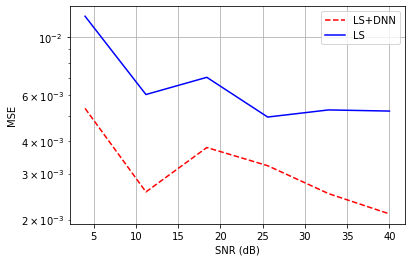

In [15]:
# plota o MSE vs as SNRs
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ax,ay[:,0], "r--")
plt.plot(ax,ayLS, "b-")
plt.legend(["LS+DNN", "LS"])
plt.yscale('log')
plt.xlabel("SNR (dB)")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

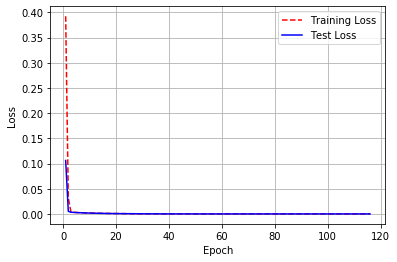

In [16]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

epoch_count = range(1, len(training_loss) + 1)


# plota o histórico da perda durante o treinamento
plt.figure()
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show();